In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv(r"..\synthetic data\tourists_features.csv",index_col=0)


In [9]:
df.columns

Index(['REGON', 'OKRES', 'RO', 'WON', 'POW', 'GMN', 'KKR', 'D8R01', 'D8R02',
       'D8R1', 'year', 'month', 'date', 'quarter', 'D8R1_mean_gmn',
       'D8R1_mean_pow', 'D8R1_mean_won', 'D8R1_quarter_mean', 'mean_3m',
       'mean_6m', 'mean_9m', 'mean_12m', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12'],
      dtype='object')

In [10]:
# --- 1. Columns to exclude from the model ---
cols_to_drop = ['REGON','D8R1', 'WON', 'POW', 'GMN', 'D8R01', 'D8R02','date']

In [11]:
# --- 2. List to store summary results ---
results = []


MODEL FOR KKR = 643
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 22
Tree depth: 5
Mean Squared Error (MSE): 3271.32
R²: -0.013


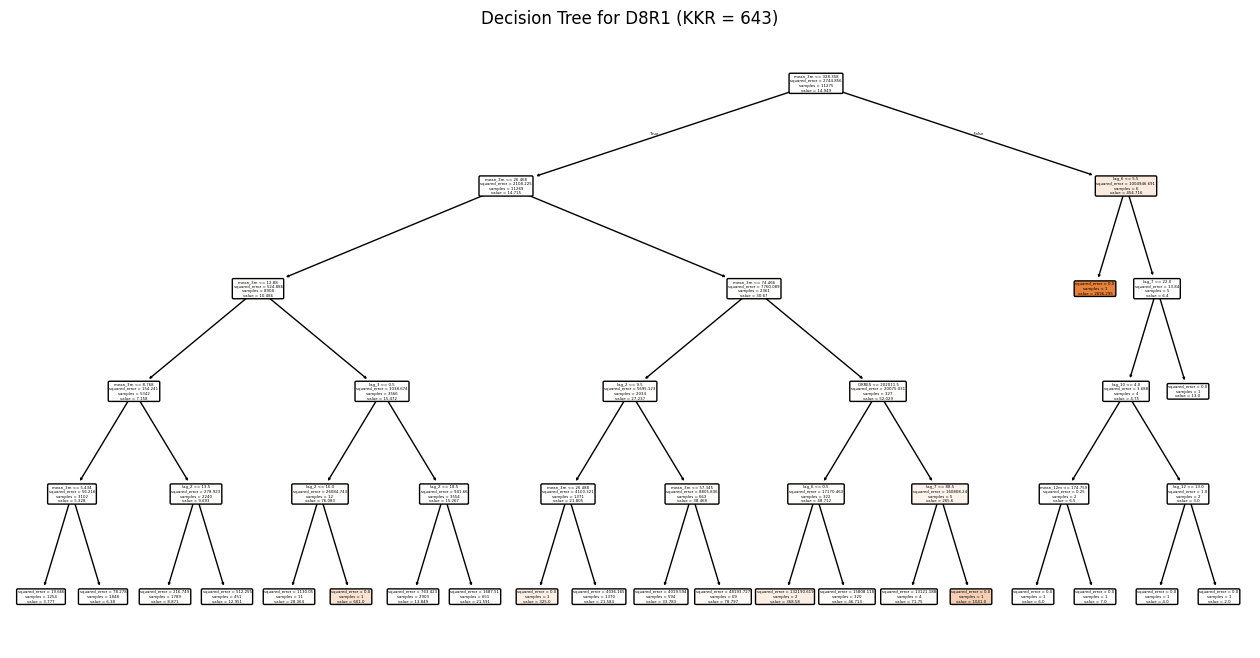


MODEL FOR KKR = 276
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 23
Tree depth: 5
Mean Squared Error (MSE): 10938.47
R²: 0.481


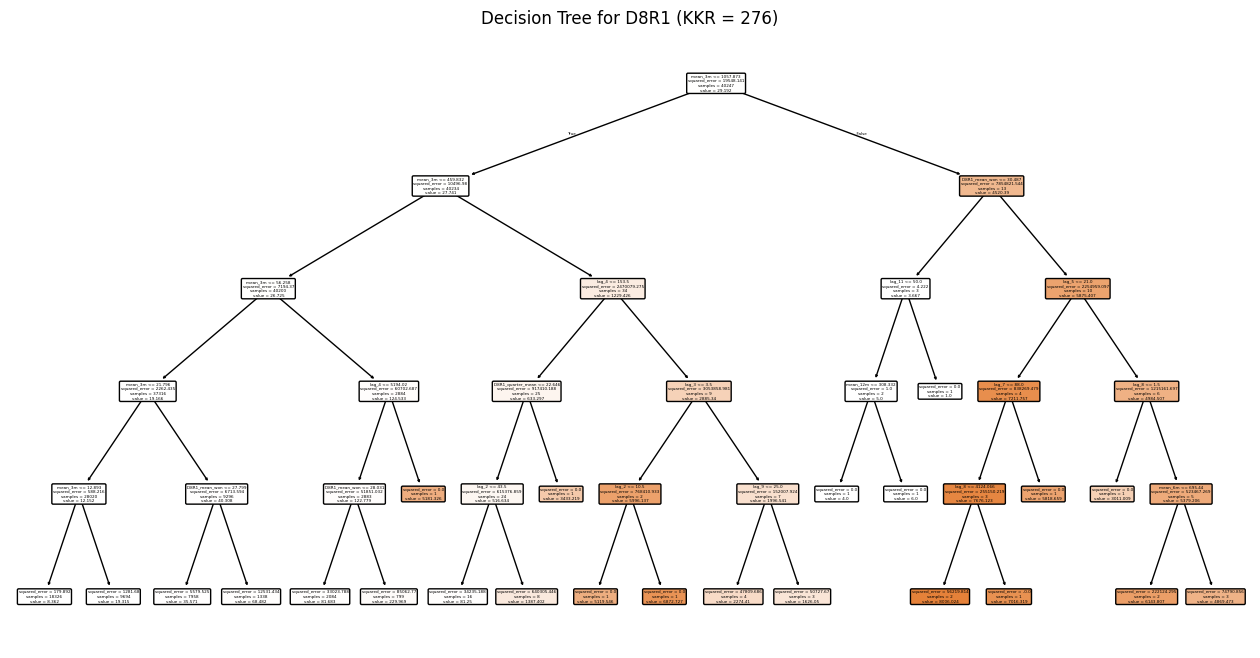


MODEL FOR KKR = 804
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 26
Tree depth: 5
Mean Squared Error (MSE): 5473.24
R²: -0.065


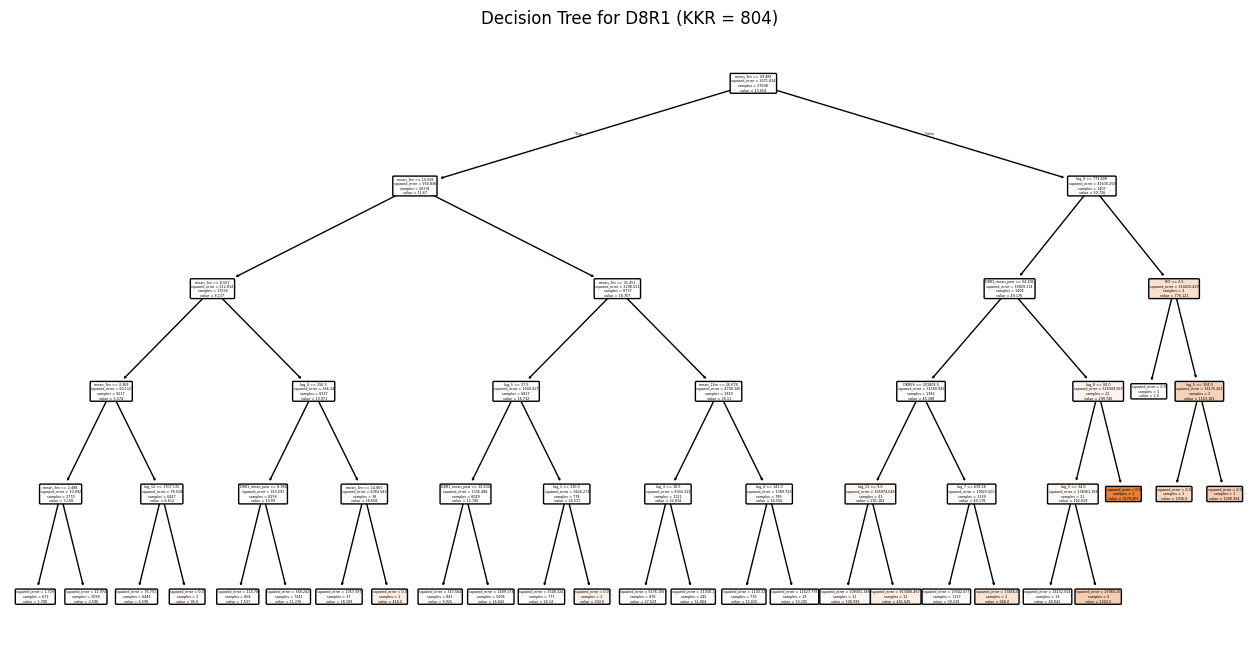


MODEL FOR KKR = 826
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 31
Tree depth: 5
Mean Squared Error (MSE): 4010.76
R²: 0.392


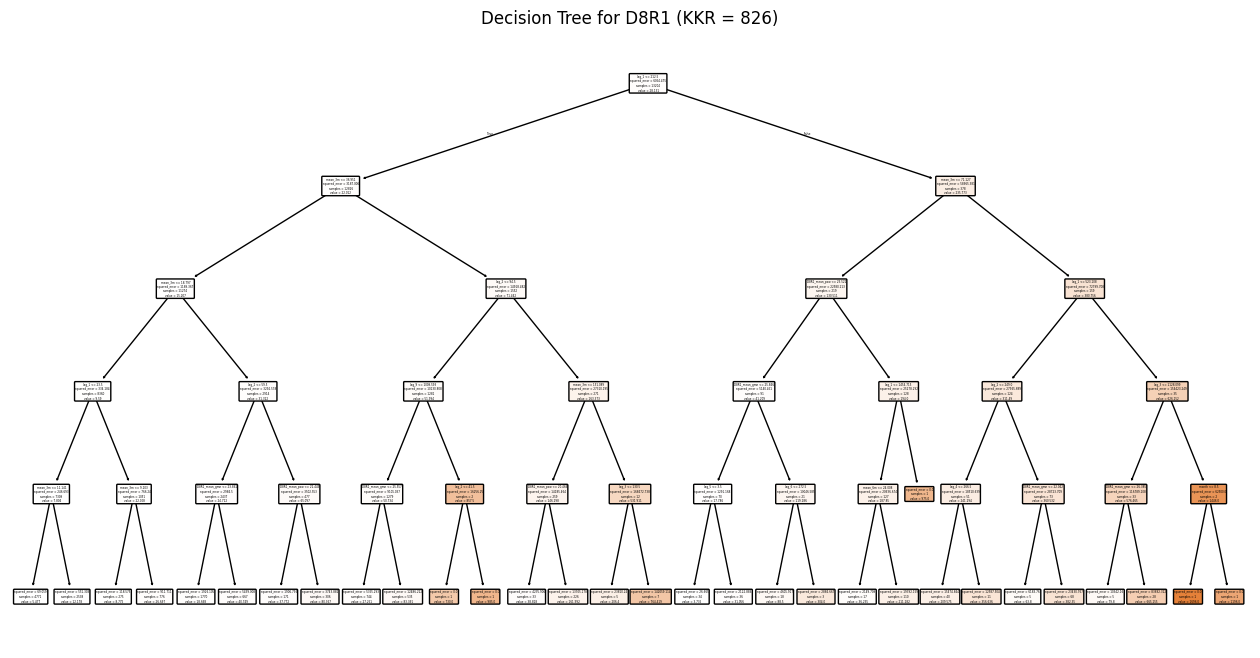


MODEL FOR KKR = 840
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 20
Tree depth: 5
Mean Squared Error (MSE): 5838.24
R²: 0.303


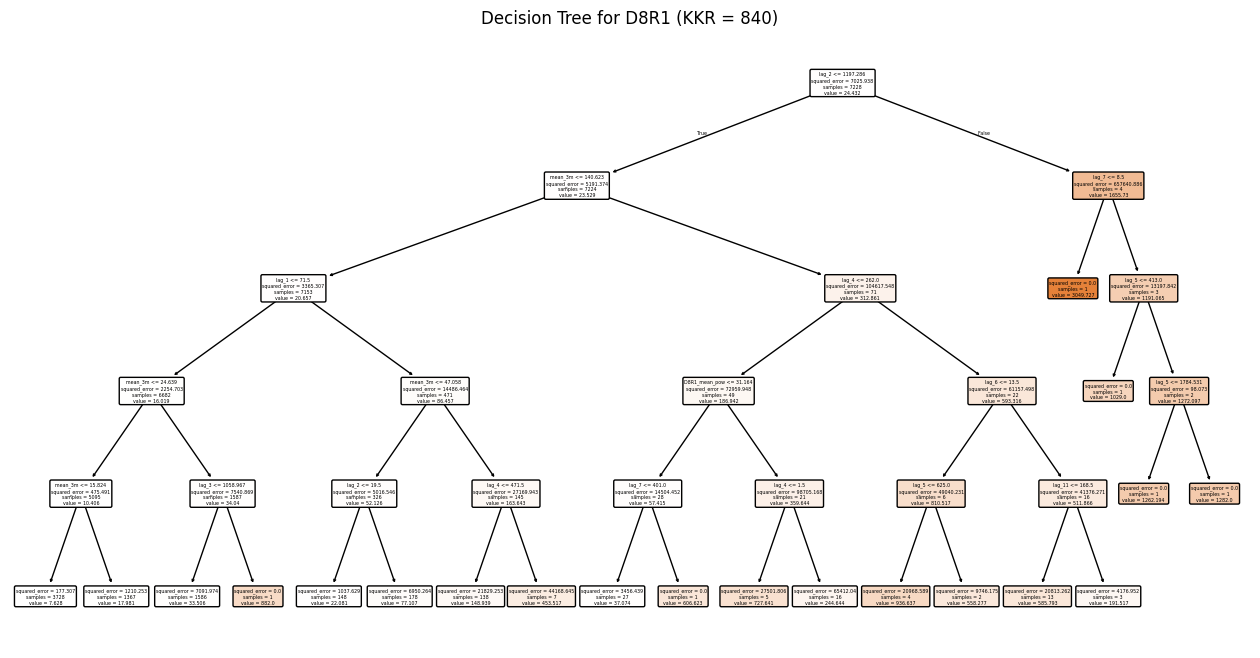


=== SUMMARY OF DECISION TREE MODELS BY KKR ===
   KKR  n_leaves  depth       MSE     R2
0  643        22      5   3271.32 -0.013
1  276        23      5  10938.47  0.481
2  804        26      5   5473.24 -0.065
3  826        31      5   4010.76  0.392
4  840        20      5   5838.24  0.303


In [12]:

# --- 3. Loop through each unique KKR value ---
for kkr_value in df['KKR'].unique():
    print(f"\n{'='*40}")
    print(f"MODEL FOR KKR = {kkr_value}")
    print(f"{'='*40}")
    
    # Filter data for a specific KKR
    df_kkr = df[df['KKR'] == kkr_value].copy()
    
    # --- Remove missing values in the dependent variable ---
    df_kkr = df_kkr.dropna(subset=['D8R1'])
    
    # Skip if there are too few records
    if len(df_kkr) < 10:
        print("Too few observations – skipping.")
        continue

    # Define independent (X) and dependent (y) variables
    X = df_kkr.drop(columns=cols_to_drop, errors='ignore')
    y = df_kkr['D8R1']

    # Remove missing values in features
    X = X.dropna(axis=0)
    y = y.loc[X.index]

    if len(X) < 5:
        print("Too few data points after cleaning – skipping.")
        continue

    # --- 4. Split into training and test sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # --- 5. Build the decision tree model ---
    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # --- 6. Predictions and evaluation ---
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # --- 7. Print model parameters and results ---
    print("Model parameters:")
    print(model.get_params())
    print(f"Number of leaves: {model.get_n_leaves()}")
    print(f"Tree depth: {model.get_depth()}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R²: {r2:.3f}")

    # --- 8. Save model summary for later analysis ---
    results.append({
        'KKR': kkr_value,
        'n_leaves': model.get_n_leaves(),
        'depth': model.get_depth(),
        'MSE': round(mse, 2),
        'R2': round(r2, 3)
    })

    # --- 9. Plot the decision tree ---
    plt.figure(figsize=(16, 8))
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree for D8R1 (KKR = {kkr_value})")
    plt.show()

# --- 10. Display summary table ---
results_df = pd.DataFrame(results)
print("\n=== SUMMARY OF DECISION TREE MODELS BY KKR ===")
print(results_df)
